In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=500)
train_input,val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2,random_state=42)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must sp

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)

In [3]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop=keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 20ms/step - loss: 0.6925 - accuracy: 0.5594 - val_loss: 0.6920 - val_accuracy: 0.5878
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6908 - accuracy: 0.6181 - val_loss: 0.6895 - val_accuracy: 0.6362
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6864 - accuracy: 0.6610 - val_loss: 0.6826 - val_accuracy: 0.6772
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6657 - accuracy: 0.7030 - val_loss: 0.6382 - val_accuracy: 0.7110
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6162 - accuracy: 0.7055 - val_loss: 0.6072 - val_accuracy: 0.7060
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5913 - accuracy: 0.7237 - val_loss: 0.5866 - val_accuracy: 0.7260
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5699 - accuracy: 0.7407 - val_loss: 0.5667 - val_accuracy:

In [4]:
import matplotlib.pyplot as plt

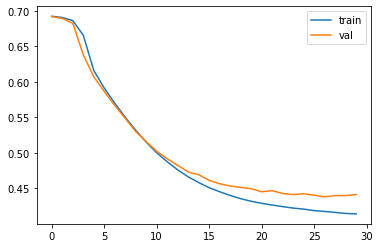

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [7]:
model2= keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [8]:
rmsprop=keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6928 - accuracy: 0.5183 - val_loss: 0.6925 - val_accuracy: 0.5340
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6912 - accuracy: 0.5664 - val_loss: 0.6906 - val_accuracy: 0.5696
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6880 - accuracy: 0.6031 - val_loss: 0.6865 - val_accuracy: 0.5904
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6805 - accuracy: 0.6405 - val_loss: 0.6758 - val_accuracy: 0.6306
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6598 - accuracy: 0.6928 - val_loss: 0.6426 - val_accuracy: 0.7274
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6206 - accuracy: 0.7308 - val_loss: 0.6079 - val_accuracy: 0.7258
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5937 - accuracy: 0.7303 - val_loss: 0.5861 - val_accuracy:

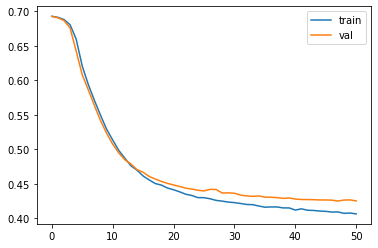

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [6]:
model3=keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [7]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
rmsprop=keras.optimizers.RMSprop(learning_rate=0.0001)
model3.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model3.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 39ms/step - loss: 0.6927 - accuracy: 0.5401 - val_loss: 0.6923 - val_accuracy: 0.5428
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6903 - accuracy: 0.6015 - val_loss: 0.6876 - val_accuracy: 0.6398
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6691 - accuracy: 0.6525 - val_loss: 0.6387 - val_accuracy: 0.6902
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6173 - accuracy: 0.7149 - val_loss: 0.6056 - val_accuracy: 0.7238
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5899 - accuracy: 0.7294 - val_loss: 0.5791 - val_accuracy: 0.7372
Epoch 6/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5613 - accuracy: 0.7434 - val_loss: 0.5489 - val_accuracy: 0.7544
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5294 - accuracy: 0.7542 - val_loss: 0.5156 - val_ac

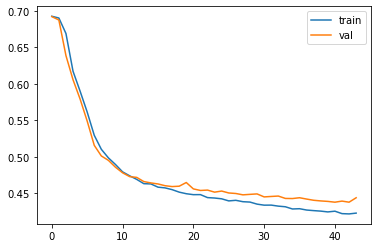

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [10]:
model4=keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid')) 

In [11]:
rmsprop=keras.optimizers.RMSprop(learning_rate=0.0001)
model4.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model4.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6923 - accuracy: 0.5307 - val_loss: 0.6914 - val_accuracy: 0.5446
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6898 - accuracy: 0.5713 - val_loss: 0.6887 - val_accuracy: 0.5736
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6859 - accuracy: 0.5939 - val_loss: 0.6844 - val_accuracy: 0.5962
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6800 - accuracy: 0.6119 - val_loss: 0.6779 - val_accuracy: 0.6114
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6712 - accuracy: 0.6273 - val_loss: 0.6682 - val_accuracy: 0.6252
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6587 - accuracy: 0.6420 - val_loss: 0.6544 - val_accuracy: 0.6390
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6409 - accuracy: 0.6546 - val_loss: 0.6353 - val_accuracy:

313/313 [==============================] - 6s 20ms/step - loss: 0.4107 - accuracy: 0.8159 - val_loss: 0.4372 - val_accuracy: 0.7972
Epoch 58/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4100 - accuracy: 0.8170 - val_loss: 0.4381 - val_accuracy: 0.7966
Epoch 59/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4099 - accuracy: 0.8163 - val_loss: 0.4383 - val_accuracy: 0.7964
Epoch 60/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4097 - accuracy: 0.8169 - val_loss: 0.4364 - val_accuracy: 0.7976
Epoch 61/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4089 - accuracy: 0.8177 - val_loss: 0.4364 - val_accuracy: 0.7972
Epoch 62/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4089 - accuracy: 0.8180 - val_loss: 0.4376 - val_accuracy: 0.7950
Epoch 63/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4081 - accuracy: 0.8164 - val_loss: 0.4350 - val_accuracy: 0.798

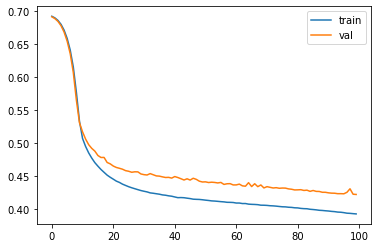

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [14]:
test_seq=pad_sequences(test_input,maxlen=100)
rnn_model=keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq,test_target)

782/782 [==============================] - 6s 7ms/step - loss: 0.4342 - accuracy: 0.7976


[0.4341908097267151, 0.7976400256156921]